# Ramem Rating Reviews

## Ratings of Ramem's Customers

![alt text](https://cdn.mikesmightygood.com/wp-content/uploads/2018/06/roasted-garlic-tofu-ramen-recipe-mikes-mighty-good.jpg)



In [27]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GABRIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# load dataset
df = pd.read_csv('ramen-ratings.csv' , sep = ',' )
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
df.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [6]:
print('Number of Reviews:' ,len(df['Review #']))
print('Number of brands:' ,len(df['Brand'].unique()))
print('Number of Countries:' ,len(df['Country'].unique()))
print('Number of pack styles:' ,len(df['Style'].unique()))

Number of Reviews: 2580
Number of brands: 355
Number of Countries: 38
Number of pack styles: 8


In [7]:
# add and transforming dataset
df['Stars'] = df['Stars'].apply(lambda x: 0 if x =='Unrated' else float(x))
df['Top_Ten'] = df['Top Ten'].apply(lambda x: 0 if x is np.NaN else x[x.find('#')+1:])
df['Top_Ten_Year'] = df['Top Ten'].apply(lambda x: 0 if x is np.NaN else x[0:4])

In [8]:
brand_mean = df.groupby('Brand')['Stars'].mean()
brand_count = df.groupby('Brand')['Review #'].count()

In [10]:
print('TOP 10 Brand Ratings: ' ,brand_mean.sort_values(ascending=False)[0:10])

TOP 10 Brand Ratings:  Brand
The Ramen Rater Select    5.0
Jackpot Teriyaki          5.0
Nyor Nyar                 5.0
Torishi                   5.0
Patanjali                 5.0
Peyang                    5.0
The Bridge                5.0
Plats Du Chef             5.0
Song Hak                  5.0
Takamori                  5.0
Name: Stars, dtype: float64


In [11]:
print('TOP 10 Brand Reviews: ' ,brand_count.sort_values(ascending=False)[0:10])

TOP 10 Brand Reviews:  Brand
Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     52
Ottogi            46
Lucky Me!         34
Name: Review #, dtype: int64


In [12]:
brand = pd.concat([brand_mean,brand_count] ,axis =1)

In [13]:
# tokenized Variety to indentify ingredients
df['Tokenized_Variety'] = df['Variety'].apply(lambda x: nltk.word_tokenize(x))

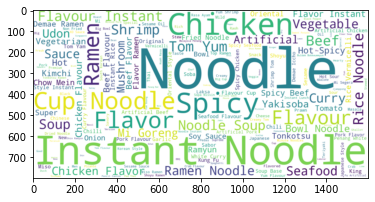

In [14]:
# plotting word cloud to identify most frequent ingredients or hot words
summary = df['Variety']
all_summary = ' '.join(s for s in summary)

wordcloud = WordCloud(background_color='white',
                      width=1600, 
                      height=800).generate(all_summary)

plt.imshow(wordcloud, interpolation='bilinear')

In [21]:
# the most relevant ingredients: sauces, vegetables and proteins
flavours = ['Chicken','Beef','Shrimp','Seafood','Rice','Vegetarian',
            'Kimchi','Fish','Pork','Duck','Crab','Egg','Tuna','Cheese']

sauces = ['Spicy','Hot','Spice','Chili','Shoyo','Pepper',
          'Mustard','Barbecue','Lemon','Curry']

veg = ['Potato','Tomato','Mushroom','Vegetable','Onion','Garlic']

In [22]:
wordlist = all_summary.split(' ')
wordfreq = [all_summary.count(w) for w in wordlist]

In [23]:
print(wordfreq[0:10])
print(wordlist[0:10])

[2, 3, 4, 79050, 676, 272, 122, 56, 272, 122]
["T's", 'Restaurant', 'Tantanmen', '', 'Noodles', 'Spicy', 'Hot', 'Sesame', 'Spicy', 'Hot']


In [24]:
# building aux functions
def flavour_id(token):
    for i in range(0,len(flavours)):
        if flavours[i] in token:
            return flavours[i]
        
def sauce_id(token):
    for i in range(0,len(sauces)):
        if sauces[i] in token:
            return sauces[i]
        
def veg_id(token):
    for i in range(0,len(veg)):
        if veg[i] in token:
            return veg[i]

In [25]:
df['Flavours'] = df['Tokenized_Variety'].apply(flavour_id)
df['Sauces'] = df['Tokenized_Variety'].apply(sauce_id)
df['Veget'] = df['Tokenized_Variety'].apply(veg_id)

Text(0.5, 1.0, 'Ramen Flavours')

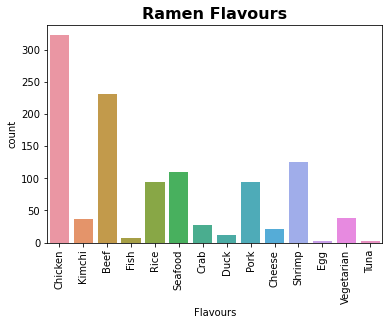

In [28]:
ax = sns.countplot(x='Flavours', data=df)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Ramen Flavours' , size = 16,weight ='bold')

Text(0.5, 1.0, 'Ramen Sauces')

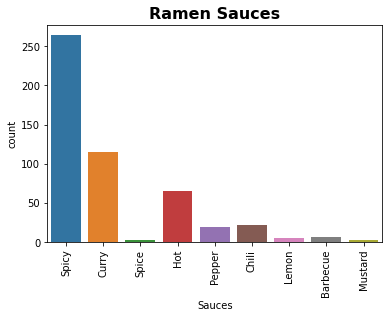

In [29]:
ax = sns.countplot(x='Sauces', data=df)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Ramen Sauces' , size = 16,weight ='bold')

Text(0.5, 1.0, 'Ramen Vegetables')

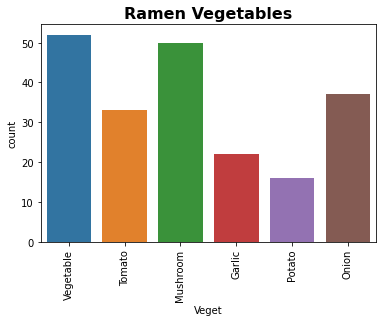

In [30]:
ax = sns.countplot(x='Veget', data=df)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Ramen Vegetables' , size = 16,weight ='bold')